In [1]:
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pkl
import pandas as pd
import os,io,sys,glob, h5py, csv, time
import matplotlib.pyplot as plt
import json

from dlab import generalephys as ephys
from dlab import generalephys_mua as ephys_mua
#from neuropixels import cell_pairs as pairs

#from neuropixels import utils_pipeline as utils
#from neuropixels import analysis_pipeline as analysis

from dlab import analysis_pipeline as analysis
from dlab.continuous_traces import gaussian_filter1d
from scipy.signal import find_peaks
from scipy.stats import pearsonr, spearmanr, zscore
from itertools import combinations 
#from neuropixels import sorting_quality_editing as sq
from sklearn.manifold import TSNE
from scipy.cluster.vq import kmeans2
#from dlab import depth_estimation as depth
#from dlab import PCA as pca
from scipy import stats

import seaborn as sns
sns.set_style('white')
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_meta = pd.read_json(r'Y:\BIOElectricsLab\Kim\NPX_recordings\cellpairs_meta_ALL.json')
df_meta = df_meta[df_meta.mouse<500][df_meta.mouse>90]

In [4]:
df_meta = df_meta.sort_values(by=['mouse'])

In [9]:
df_kin = pd.read_csv(r'Y:\BIOElectricsLab\Kim\Kinematics\OutputsJuly18\SessionMeans_max.csv')

In [15]:
df_kin['mouse'] = [96,99,100,101,102,97,103,104]

In [16]:
df_kin = df_kin.sort_values(by=['mouse'])

In [24]:
df_kin.SessionConsistency

0    0.745067
5    0.892205
1    0.877470
2    0.670792
3    0.938116
4    0.921959
6    0.876341
7    0.914096
Name: SessionConsistency, dtype: float64

In [21]:
df_meta

,index,mouse,propPairs,cohort,RSRSpairs,RSFSpairs,successRate,FRmean,gmeanRS,gmeanFS,stds,num_units,percentGain,percentLoss,successRate_diff,percentBaseline,successpercent,numreaches,consist
13,6,96,0.018748,CUP,0.005124,0.006749,0.642857,1.707637,1.292358,2.982724,4.290199,127.0,3.0,38.0,-0.07,63.0,NaN,NaN,NaN
7,0,97,0.022349,cntrl,0.003302,0.010286,0.148515,1.806985,1.555827,3.830753,5.883722,126.0,0.0,0.0,-0.14,0.0,0.2375,80.0,0.914096
11,4,99,0.018948,CUP,0.003583,0.010111,0.200000,2.202005,2.201593,2.216725,3.244006,159.0,13.0,41.0,-0.10,66.0,NaN,NaN,NaN
8,1,100,0.012281,CUP,0.001754,0.004912,0.361446,1.425351,1.285899,1.606893,3.259993,76.0,10.0,47.0,-0.30,58.0,NaN,NaN,NaN
9,2,101,0.006286,CUP,0.002039,0.003228,0.178082,0.937884,0.646608,2.175533,3.498815,109.0,17.0,65.0,-0.36,41.0,NaN,NaN,NaN
14,7,102,0.019512,CUP,0.009756,0.008537,0.659091,2.726278,2.390921,5.862724,2.827101,41.0,29.0,48.0,0.00,66.0,NaN,NaN,NaN
12,5,103,0.010784,cntrl,0.004342,0.005602,0.454545,1.116917,1.053957,1.470021,1.986124,121.0,0.0,0.0,-0.05,0.0,NaN,NaN,NaN
10,3,104,0.018411,cntrl,0.003028,0.007267,0.222222,0.671198,0.598682,0.879222,1.918753,129.0,0.0,0.0,-0.12,0.0,NaN,NaN,NaN


In [18]:
df_meta['successpercent'] = df_kin.SuccessPercent

In [19]:
df_meta['numreaches'] = df_kin.NumReaches

In [20]:
df_meta['consist'] = df_kin.SessionConsistency

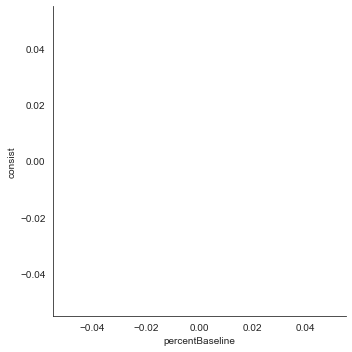

In [22]:
sns.lmplot(x='percentBaseline',y='consist',data=df_meta[df_meta.cohort=='CUP'])